In [1]:
%matplotlib notebook
%matplotlib inline
import pandas as pd
import pathlib as path
import numpy as np
import matplotlib.pyplot as plt
import os
import requests
import hvplot.pandas
import datetime as dt
import seaborn as sns
from config import api_key
from pprint import pprint
from sklearn.linear_model import LinearRegression
import certifi
import json

In [2]:
# import data for Dollarama, Canadian_tire, and Linamar companies.

Dollarama_balance_sheet=pd.read_csv("Resource/Dollarama_balance_sheet.csv")
Dollarama_income_statement = pd.read_csv("Resource/Dollarama_income_tatement.csv")
Dollarama_cash_flow_statement = pd.read_csv("Resource/Dollarama_cash_flow_statement.csv")

Canadian_tire_balance_sheet = pd.read_csv("Resource/Canadian_tire_balance_sheet.csv")
Canadian_tire_income_statement = pd.read_csv("Resource/Canadian_tire_income_statement.csv")
Canadian_tire_cash_flow_statement = pd.read_csv("Resource/Canadian_tire_cash_flow_statement.csv")

Linamar_balance_sheet = pd.read_csv("Resource/Linamar_balance_sheet.csv")
Linamar_income_statement = pd.read_csv("Resource/Linamar_income_statement.csv")
Linamar_cash_flow_statement = pd.read_csv("Resource/Linamar_cash_flow_statement.csv")


In [3]:
# To check any random data frame
Dollarama_balance_sheet.head(10)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,Dollarama Inc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Premium Export,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Balance Sheet,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,FY-9,FY-8,FY-7,FY-6,FY-5,FY-4,FY-3,FY-2,FY-1,FY
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Period End Date,2014-02-02,2015-02-01,2016-01-31,2017-01-29,2018-01-28,2019-02-03,2020-02-02,2021-01-31,2022-01-30,2023-01-29
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Rename the columns.
Dollarama_balance_sheet=Dollarama_balance_sheet.rename(columns=        
         { "Unnamed: 0": "Dollarama",
          'Unnamed: 1':'2014',
          'Unnamed: 2':'2015',
          'Unnamed: 3':'2016', 
          'Unnamed: 4':'2017',
          'Unnamed: 5':"2018", 
          'Unnamed: 6':'2019',
          'Unnamed: 7':'2020', 
          'Unnamed: 8':'2021',
          'Unnamed: 9':'2022',
          'Unnamed: 10': '2023'})

Dollarama_income_statement = Dollarama_income_statement.rename(columns=        
         { "Unnamed: 0": "Dollarama",
          'Unnamed: 1':'2014',
          'Unnamed: 2':'2015',
          'Unnamed: 3':'2016', 
          'Unnamed: 4':'2017',
          'Unnamed: 5':'2018', 
          'Unnamed: 6':'2019',
          'Unnamed: 7':'2020', 
          'Unnamed: 8':'2021',
          'Unnamed: 9':'2022',
          'Unnamed: 10': '2023'})

Dollarama_cash_flow_statement = Dollarama_cash_flow_statement.rename(columns=        
         { "Unnamed: 0": "Dollarama",
          'Unnamed: 1':'2014',
          'Unnamed: 2':'2015',
          'Unnamed: 3':'2016', 
          'Unnamed: 4':'2017',
          'Unnamed: 5':'2018', 
          'Unnamed: 6':'2019',
          'Unnamed: 7':'2020', 
          'Unnamed: 8':'2021',
          'Unnamed: 9':'2022',
          'Unnamed: 10': '2023'})


Canadian_tire_balance_sheet = Canadian_tire_balance_sheet.rename(columns=        
         { "Canadian Tire Corporation Limited": "Canadian Tire",
          'Unnamed: 1':'2013',
          'Unnamed: 2':'2014',
          'Unnamed: 3':'2015', 
          'Unnamed: 4':'2016',
          'Unnamed: 5':"2017", 
          'Unnamed: 6':'2018',
          'Unnamed: 7':'2019', 
          'Unnamed: 8':'2020',
          'Unnamed: 9':'2021',
          'Unnamed: 10': '2022'})

Canadian_tire_income_statement = Canadian_tire_income_statement.rename(columns=        
         { "Unnamed: 0": "Canadian Tire",
          'Unnamed: 1':'2013',
          'Unnamed: 2':'2014',
          'Unnamed: 3':'2015', 
          'Unnamed: 4':'2016',
          'Unnamed: 5':"2017", 
          'Unnamed: 6':'2018',
          'Unnamed: 7':'2019', 
          'Unnamed: 8':'2020',
          'Unnamed: 9':'2021',
          'Unnamed: 10': '2022'})

Canadian_tire_cash_flow_statement = Canadian_tire_cash_flow_statement.rename(columns=        
         { "Unnamed: 0": "Canadian Tire",
          'Unnamed: 1':'2013',
          'Unnamed: 2':'2014',
          'Unnamed: 3':'2015', 
          'Unnamed: 4':'2016',
          'Unnamed: 5':"2017", 
          'Unnamed: 6':'2018',
          'Unnamed: 7':'2019', 
          'Unnamed: 8':'2020',
          'Unnamed: 9':'2021',
          'Unnamed: 10': '2022'})

Linamar_balance_sheet = Linamar_balance_sheet.rename(columns=        
         { "Unnamed: 0": "Linamar",
          'Unnamed: 1':'2013',
          'Unnamed: 2':'2014',
          'Unnamed: 3':'2015', 
          'Unnamed: 4':'2016',
          'Unnamed: 5':"2017", 
          'Unnamed: 6':'2018',
          'Unnamed: 7':'2019', 
          'Unnamed: 8':'2020',
          'Unnamed: 9':'2021',
          'Unnamed: 10': '2022'})

Linamar_income_statement = Linamar_income_statement.rename(columns=        
         { "Unnamed: 0": "Linamar",
          'Unnamed: 1':'2013',
          'Unnamed: 2':'2014',
          'Unnamed: 3':'2015', 
          'Unnamed: 4':'2016',
          'Unnamed: 5':"2017", 
          'Unnamed: 6':'2018',
          'Unnamed: 7':'2019', 
          'Unnamed: 8':'2020',
          'Unnamed: 9':'2021',
          'Unnamed: 10': '2022'})

Linamar_cash_flow_statement = Linamar_cash_flow_statement.rename(columns=        
         { "Unnamed: 0": "Linamar",
          'Unnamed: 1':'2013',
          'Unnamed: 2':'2014',
          'Unnamed: 3':'2015', 
          'Unnamed: 4':'2016',
          'Unnamed: 5':"2017", 
          'Unnamed: 6':'2018',
          'Unnamed: 7':'2019', 
          'Unnamed: 8':'2020',
          'Unnamed: 9':'2021',
          'Unnamed: 10': '2022'})

In [5]:
# For test
Dollarama_balance_sheet.head(10)

,Dollarama,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Dollarama Inc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Premium Export,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Balance Sheet,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,FY-9,FY-8,FY-7,FY-6,FY-5,FY-4,FY-3,FY-2,FY-1,FY
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Period End Date,2014-02-02,2015-02-01,2016-01-31,2017-01-29,2018-01-28,2019-02-03,2020-02-02,2021-01-31,2022-01-30,2023-01-29
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# Clean data for Dollarama
Dollarama_balance_sheet = Dollarama_balance_sheet.loc[Dollarama_balance_sheet["Dollarama"] != 'Period End Date']
Dollarama_balance_sheet = Dollarama_balance_sheet.dropna(how='any')
Dollarama_balance_sheet = Dollarama_balance_sheet.set_index("Dollarama")

Dollarama_income_statement = Dollarama_income_statement.loc[Dollarama_income_statement["Dollarama"] != 'Period End Date']
Dollarama_income_statement = Dollarama_income_statement.dropna(how='any')
Dollarama_income_statement = Dollarama_income_statement.set_index("Dollarama")

Dollarama_cash_flow_statement = Dollarama_cash_flow_statement.loc[Dollarama_cash_flow_statement["Dollarama"] != 'Period End Date']
Dollarama_cash_flow_statement = Dollarama_cash_flow_statement.dropna(how='any')
Dollarama_cash_flow_statement = Dollarama_cash_flow_statement.set_index("Dollarama")

# Clean data for Canadian_tire
Canadian_tire_balance_sheet = Canadian_tire_balance_sheet.loc[Canadian_tire_balance_sheet["Canadian Tire"] != 'Period End Date']
Canadian_tire_balance_sheet = Canadian_tire_balance_sheet.dropna(how='any')
Canadian_tire_balance_sheet = Canadian_tire_balance_sheet.set_index("Canadian Tire")

Canadian_tire_income_statement = Canadian_tire_income_statement.loc[Canadian_tire_income_statement["Canadian Tire"] != 'Period End Date']
Canadian_tire_income_statement = Canadian_tire_income_statement.dropna(how='any')
Canadian_tire_income_statement = Canadian_tire_income_statement.set_index("Canadian Tire")

Canadian_tire_cash_flow_statement = Canadian_tire_cash_flow_statement.loc[Canadian_tire_cash_flow_statement["Canadian Tire"] != 'Period End Date']
Canadian_tire_cash_flow_statement = Canadian_tire_cash_flow_statement.dropna(how='any')
Canadian_tire_cash_flow_statement = Canadian_tire_cash_flow_statement.set_index("Canadian Tire")


# Clean data for Linamar
Linamar_balance_sheet = Linamar_balance_sheet.loc[Linamar_balance_sheet["Linamar"] != 'Period End Date']
Linamar_balance_sheet = Linamar_balance_sheet.dropna(how='any')
Linamar_balance_sheet = Linamar_balance_sheet.set_index("Linamar")

Linamar_income_statement = Linamar_income_statement.loc[Linamar_income_statement["Linamar"] != 'Period End Date']
Linamar_income_statement = Linamar_income_statement.dropna(how='any')
Linamar_income_statement = Linamar_income_statement.set_index("Linamar")

Linamar_cash_flow_statement = Linamar_cash_flow_statement.loc[Linamar_cash_flow_statement["Linamar"] != 'Period End Date']
Linamar_cash_flow_statement = Linamar_cash_flow_statement.dropna(how='any')
Linamar_cash_flow_statement = Linamar_cash_flow_statement.set_index("Linamar")

In [7]:
# Convert rows to columns and vice versa

Dollarama_balance_sheet_df = Dollarama_balance_sheet.transpose()
Dollarama_income_statement_df = Dollarama_income_statement.transpose()
Dollarama_cash_flow_statement_df = Dollarama_cash_flow_statement.transpose()

Canadian_tire_balance_sheet_df = Canadian_tire_balance_sheet.transpose()
Canadian_tire_income_statement_df = Canadian_tire_income_statement.transpose()
Canadian_tire_cash_flow_statement_df = Canadian_tire_cash_flow_statement.transpose()

Linamar_balance_sheet_df = Linamar_balance_sheet.transpose()
Linamar_income_statement_df = Linamar_income_statement.transpose()
Linamar_cash_flow_statement_df = Linamar_cash_flow_statement.transpose()

In [8]:
# Apply conversion function
def convert_to_float(value):
    try:
        # Replace non-numeric characters and convert to float
        return float(value.replace('%', '').replace(',', ''))
    except ValueError:
        # Handle errors, e.g., if the value is already numeric or contains unexpected characters
        return value

# Apply the conversion function to the entire DataFrame
Dollarama_balance_sheet_df = Dollarama_balance_sheet_df.applymap(convert_to_float)
Dollarama_income_statement_df_df = Dollarama_income_statement_df.applymap(convert_to_float)
Dollarama_cash_flow_statement_df = Dollarama_cash_flow_statement_df.applymap(convert_to_float)
Canadian_tire_balance_sheet_df = Canadian_tire_balance_sheet_df.applymap(convert_to_float)
Canadian_tire_income_statement_df = Canadian_tire_income_statement_df.applymap(convert_to_float)
Canadian_tire_cash_flow_statement_df = Canadian_tire_cash_flow_statement_df.applymap(convert_to_float)
Linamar_balance_sheet_df = Linamar_balance_sheet_df.applymap(convert_to_float)
Linamar_income_statement_df = Linamar_income_statement_df.applymap(convert_to_float)
Linamar_cash_flow_statement_df = Linamar_cash_flow_statement_df.applymap(convert_to_float)

/var/folders/7f/58hsj7kj34qg3whng_lx_2xh0000gn/T/ipykernel_17034/4019636098.py:11: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  Dollarama_balance_sheet_df = Dollarama_balance_sheet_df.applymap(convert_to_float)
/var/folders/7f/58hsj7kj34qg3whng_lx_2xh0000gn/T/ipykernel_17034/4019636098.py:12: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  Dollarama_income_statement_df_df = Dollarama_income_statement_df.applymap(convert_to_float)
/var/folders/7f/58hsj7kj34qg3whng_lx_2xh0000gn/T/ipykernel_17034/4019636098.py:13: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  Dollarama_cash_flow_statement_df = Dollarama_cash_flow_statement_df.applymap(convert_to_float)
/var/folders/7f/58hsj7kj34qg3whng_lx_2xh0000gn/T/ipykernel_17034/4019636098.py:14: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  Canadian_tire_balance_sheet_df = Canadian_tire_balance_sheet_d

# **Liquidity Ratio**

In [9]:
# Making the data frame with 3 liquidity ratios

columns = ["Ticker", "Working Capital Ratio", "Quick Ratio", "Operating Cash Flow Ratio"]

Dollarama_ratios_df = pd.DataFrame(columns=columns)

Canadian_tire_ratios_df = pd.DataFrame(columns=columns)

Linamar_ratios_df = pd.DataFrame(columns=columns)

## **Dollarama**

In [10]:
# Working capital ratio = Current assets / Current liabilities
Dollarama_ratios_df["Working Capital Ratio"] = Dollarama_balance_sheet_df["Total Current Assets"] / Dollarama_balance_sheet_df["Total Current Liabilities"]

# Quick Ratio = Current assets – (Inventory / Current liabilities)
Dollarama_ratios_df["Quick Ratio"] = (Dollarama_balance_sheet_df['Inventory'] - (Dollarama_balance_sheet_df["Inventory"] / Dollarama_balance_sheet_df["Total Current Liabilities"]))

# Operating cash flow ratio = Operating cash flow / Current liabilities
Dollarama_ratios_df["Operating Cash Flow Ratio"] = Dollarama_cash_flow_statement_df["Cash from Operations"] / Dollarama_balance_sheet_df["Total Current Liabilities"]

In [11]:
# Replacing Ticker name to Dollarama
Dollarama_ratios_df["Ticker"] = "Dollarama"
Dollarama_ratios_df = Dollarama_ratios_df.drop(Dollarama_ratios_df.index[9]).reset_index(drop=False)
Dollarama_ratios_df

,index,Ticker,Working Capital Ratio,Quick Ratio,Operating Cash Flow Ratio
0,2014,Dollarama,2.801910,362.453613,1.882661
1,2015,Dollarama,2.544633,407.021394,1.651439
2,2016,Dollarama,2.717455,468.123894,1.978791
3,2017,Dollarama,1.088942,464.807884,0.983962
4,2018,Dollarama,0.790586,490.246051,0.884026
5,2019,Dollarama,1.553401,579.929636,1.547611
6,2020,Dollarama,0.699779,622.919291,0.670498
7,2021,Dollarama,0.832873,630.177652,0.672605
8,2022,Dollarama,0.786681,590.278976,1.271224


## **Canadian Tire**

In [12]:
# Working capital ratio = Current assets / Current liabilities
Canadian_tire_ratios_df["Working Capital Ratio"] = Canadian_tire_balance_sheet_df["Total Current Assets"] / Canadian_tire_balance_sheet_df["Total Current Liabilities"]

# Quick Ratio = Current assets – (Inventory / Current liabilities)
Canadian_tire_ratios_df["Quick Ratio"] = (Canadian_tire_balance_sheet_df['Inventory'] - (Canadian_tire_balance_sheet_df["Inventory"] / Canadian_tire_balance_sheet_df["Total Current Liabilities"]))

# Operating cash flow ratio = Operating cash flow / Current liabilities
Canadian_tire_ratios_df["Operating Cash Flow Ratio"] = Canadian_tire_cash_flow_statement_df["Cash from Operations"] / Canadian_tire_balance_sheet_df["Total Current Liabilities"]

In [13]:
# Replacing Ticker name to Canadian Tire
Canadian_tire_ratios_df["Ticker"] = "Canadian Tire"
Canadian_tire_ratios_df = Canadian_tire_ratios_df.drop(Canadian_tire_ratios_df.index[9]).reset_index(drop=False)
Canadian_tire_ratios_df

,index,Ticker,Working Capital Ratio,Quick Ratio,Operating Cash Flow Ratio
0,2013,Canadian Tire,1.845816,1480.657342,0.206613
1,2014,Canadian Tire,1.858609,1623.445366,0.125470
2,2015,Canadian Tire,2.238092,1764.045677,0.252047
3,2016,Canadian Tire,1.845308,1710.334536,0.210729
4,2017,Canadian Tire,1.941873,1769.409290,0.214760
5,2018,Canadian Tire,1.760260,1997.120117,0.153551
6,2019,Canadian Tire,1.661387,2212.515242,0.189102
7,2020,Canadian Tire,2.025971,2312.455707,0.469246
8,2021,Canadian Tire,1.715258,2480.234669,0.255655


## **Linamar**

In [14]:
# Working capital ratio = Current assets / Current liabilities
Linamar_ratios_df["Working Capital Ratio"] = Linamar_balance_sheet_df["Total Current Assets"] / Linamar_balance_sheet_df["Total Current Liabilities"]

# Quick Ratio = Current assets – (Inventory / Current liabilities)
Linamar_ratios_df["Quick Ratio"] = (Linamar_balance_sheet_df['Inventory'] - (Linamar_balance_sheet_df["Inventory"] / Linamar_balance_sheet_df["Total Current Liabilities"]))

# Operating cash flow ratio = Operating cash flow / Current liabilities
Linamar_ratios_df["Operating Cash Flow Ratio"] = Linamar_cash_flow_statement_df["Cash from Operations"] / Linamar_balance_sheet_df["Total Current Liabilities"]

In [15]:
# Replacing Ticker name to Linamar
Linamar_ratios_df["Ticker"] = "Linamar"
Linamar_ratios_df = Linamar_ratios_df.drop(Linamar_ratios_df.index[9]).reset_index(drop=False)
Linamar_ratios_df

,index,Ticker,Working Capital Ratio,Quick Ratio,Operating Cash Flow Ratio
0,2013,Linamar,1.599567,379.746100,0.822609
1,2014,Linamar,1.716905,454.097102,0.711474
2,2015,Linamar,1.879970,543.928028,0.747072
3,2016,Linamar,1.692266,690.839007,0.709211
4,2017,Linamar,1.911462,791.059129,0.488857
5,2018,Linamar,2.009736,1218.185706,0.436815
6,2019,Linamar,1.851177,991.033579,0.854099
7,2020,Linamar,1.251493,863.761705,0.652683
8,2021,Linamar,1.708876,1065.844892,0.520746


In [16]:
# Combinig the all data frames
combined_df = pd.concat([Dollarama_ratios_df, Canadian_tire_ratios_df, Linamar_ratios_df])

# Filter data for the working capital ratio between the three companies (Dollarama, Canadian Tire & Linamar)
filtered_working_capital_ratio_df = combined_df[["Ticker", "index", "Working Capital Ratio"]]

# Filter data for the quick ratio between the three companies (Dollarama, Canadian Tire & Linamar)
filtered_quick_ratio_df = combined_df[["Ticker", "index", "Quick Ratio"]]

# Filter data for the operating cash flow ratio between the three companies (Dollarama, Canadian Tire & Linamar)
filtered_operating_cash_flow_ratio_df = combined_df[["Ticker", "index", "Operating Cash Flow Ratio"]]


/Users/jash/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jash/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jash/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jash/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) 

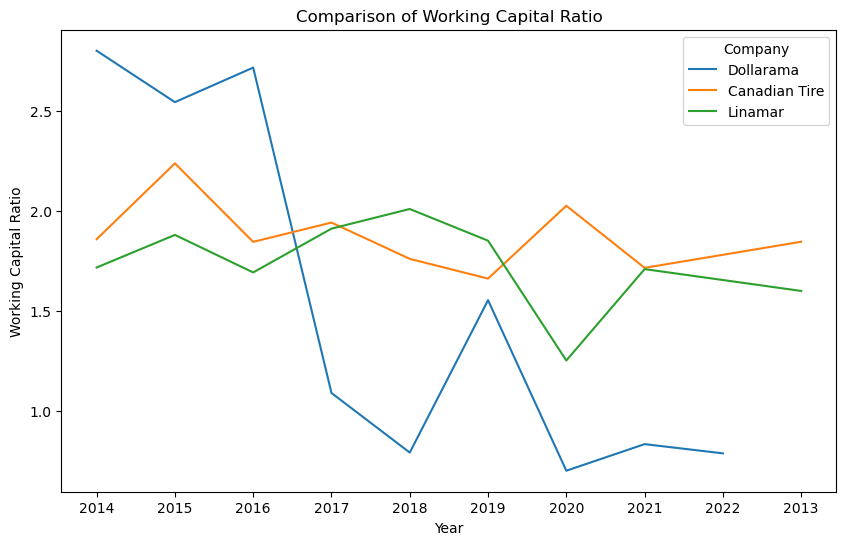

In [17]:
# Plotting the comparison of the Working Capital Ratio
plt.figure(figsize=(10, 6))

sns.lineplot(x='index', y='Working Capital Ratio', hue='Ticker', data=filtered_working_capital_ratio_df)
plt.title('Comparison of Working Capital Ratio')
plt.xlabel('Year')
plt.ylabel('Working Capital Ratio')
plt.legend(title='Company', loc='best')
plt.show()

/Users/jash/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jash/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jash/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jash/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) 

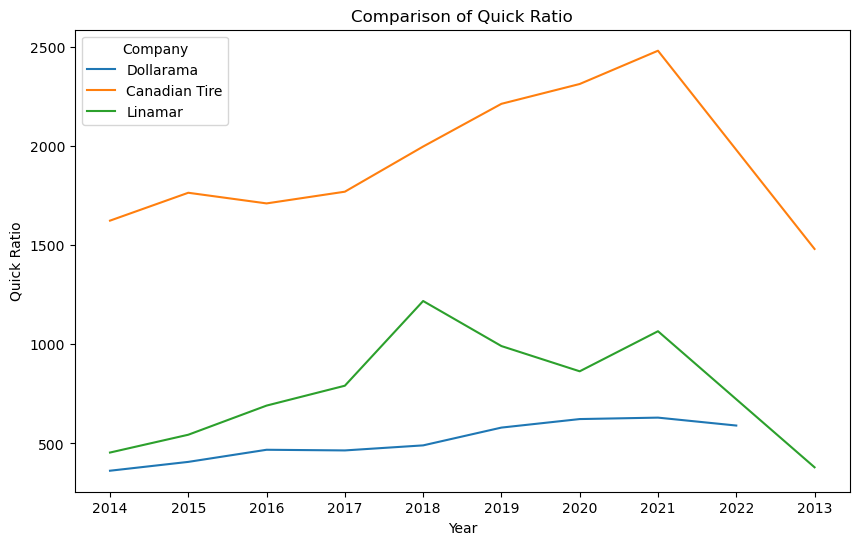

In [18]:
# Plotting the comparison of the Quick Ratio

plt.figure(figsize=(10, 6))

sns.lineplot(x='index', y='Quick Ratio', hue='Ticker', data=filtered_quick_ratio_df)
plt.title('Comparison of Quick Ratio')
plt.xlabel('Year')
plt.ylabel('Quick Ratio')
plt.legend(title='Company', loc='best')
plt.show()

/Users/jash/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jash/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jash/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jash/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) 

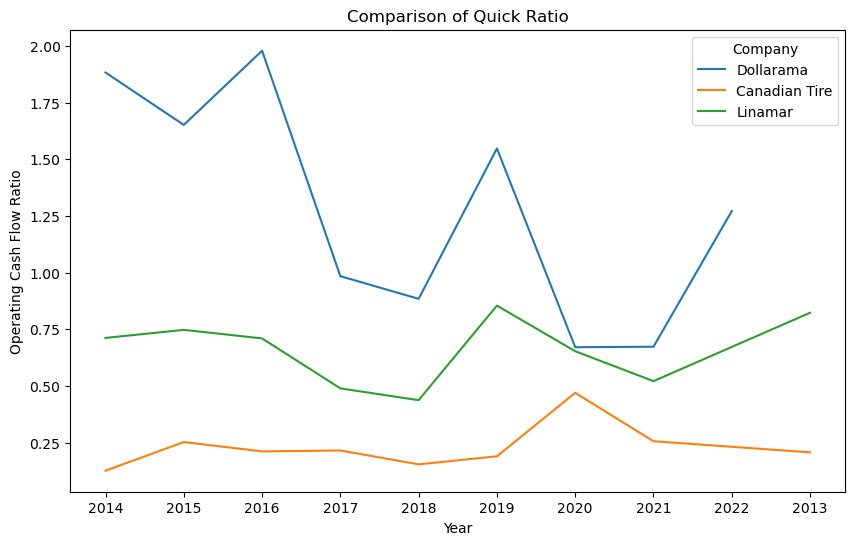

In [19]:
# Plotting the comparison of the Operating cash flow ratio

plt.figure(figsize=(10, 6))

sns.lineplot(x='index', y='Operating Cash Flow Ratio', hue='Ticker', data=filtered_operating_cash_flow_ratio_df)
plt.title('Comparison of Quick Ratio')
plt.xlabel('Year')
plt.ylabel('Operating Cash Flow Ratio')
plt.legend(title='Company', loc='best')
plt.show()

In [20]:
# Convert the 'index' column to numeric type

Dollarama_ratios_df['index'] = pd.to_numeric(Dollarama_ratios_df['index'], errors='coerce')
Canadian_tire_ratios_df['index'] = pd.to_numeric(Canadian_tire_ratios_df['index'], errors='coerce')
Linamar_ratios_df['index'] = pd.to_numeric(Linamar_ratios_df['index'], errors='coerce')

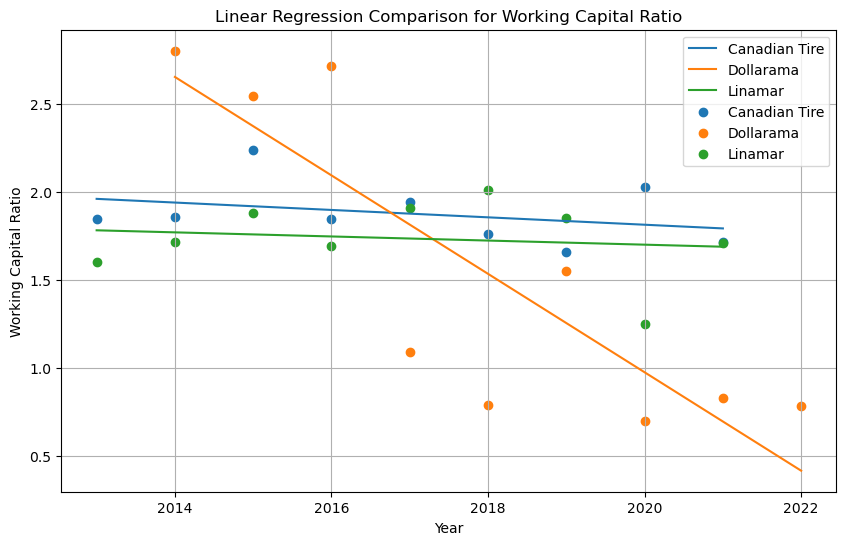

In [21]:
# Combine the data for 'Working Capital Ratio' and 'index' columns for all three companies
working_capital_combined = pd.concat([Dollarama_ratios_df[['index', 'Working Capital Ratio']], 
                           Canadian_tire_ratios_df[['index', 'Working Capital Ratio']], 
                           Linamar_ratios_df[['index', 'Working Capital Ratio']]], 
                          keys=['Dollarama', 'Canadian Tire', 'Linamar'])  # Adding keys to differentiate companies

# Create a figure and axis for the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Loop through each company and plot its linear regression line
for company, company_data in working_capital_combined.groupby(level=0):
    X = company_data['index'].values.reshape(-1, 1)
    Y = company_data['Working Capital Ratio']
    
    model = LinearRegression()
    model.fit(X, Y)
    
    # Plot the regression line
    plt.plot(X, model.predict(X), label=company)

# Plot the actual data points for each company
for company, company_data in working_capital_combined.groupby(level=0):
    plt.scatter(company_data['index'], company_data['Working Capital Ratio'], label=company, marker='o')

plt.xlabel('Year')
plt.ylabel('Working Capital Ratio')
plt.title('Linear Regression Comparison for Working Capital Ratio')
plt.legend()
plt.grid(True)
plt.show()

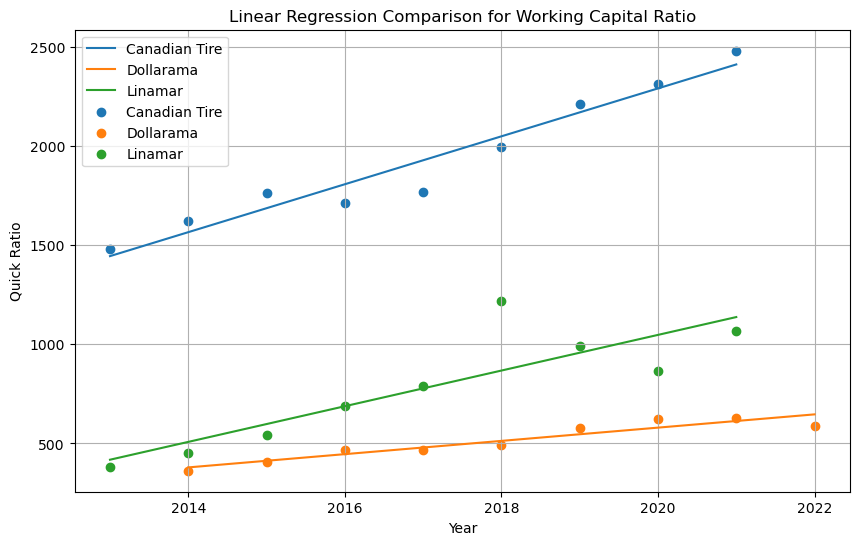

In [22]:
# Combine the data for 'Working Capital Ratio' and 'index' columns for all three companies
quick_ratio_combined = pd.concat([Dollarama_ratios_df[['index', 'Quick Ratio']], 
                           Canadian_tire_ratios_df[['index', 'Quick Ratio']], 
                           Linamar_ratios_df[['index', 'Quick Ratio']]], 
                          keys=['Dollarama', 'Canadian Tire', 'Linamar'])  # Adding keys to differentiate companies

# Create a figure and axis for the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Loop through each company and plot its linear regression line
for company, company_data in quick_ratio_combined.groupby(level=0):
    X = company_data['index'].values.reshape(-1, 1)
    Y = company_data['Quick Ratio']
    
    model = LinearRegression()
    model.fit(X, Y)
    
    # Plot the regression line
    plt.plot(X, model.predict(X), label=company)

# Plot the actual data points for each company
for company, company_data in quick_ratio_combined.groupby(level=0):
    plt.scatter(company_data['index'], company_data['Quick Ratio'], label=company, marker='o')

plt.xlabel('Year')
plt.ylabel('Quick Ratio')
plt.title('Linear Regression Comparison for Working Capital Ratio')
plt.legend()
plt.grid(True)
plt.show()

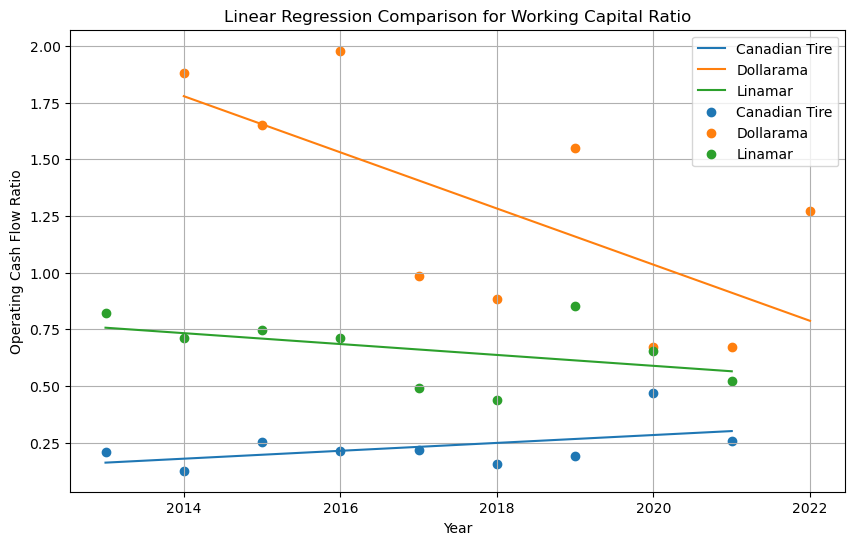

In [23]:
# Combine the data for the 'Operating' and 'index' columns for all three companies
operating_cash_flow_combined = pd.concat([Dollarama_ratios_df[['index', 'Operating Cash Flow Ratio']], 
                           Canadian_tire_ratios_df[['index', 'Operating Cash Flow Ratio']], 
                           Linamar_ratios_df[['index', 'Operating Cash Flow Ratio']]], 
                          keys=['Dollarama', 'Canadian Tire', 'Linamar'])  # Adding keys to differentiate companies

# Create a figure and axis for the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Loop through each company and plot its linear regression line
for company, company_data in operating_cash_flow_combined.groupby(level=0):
    X = company_data['index'].values.reshape(-1, 1)
    Y = company_data['Operating Cash Flow Ratio']
    
    model = LinearRegression()
    model.fit(X, Y)
    
    # Plot the regression line
    plt.plot(X, model.predict(X), label=company)

# Plot the actual data points for each company
for company, company_data in operating_cash_flow_combined.groupby(level=0):
    plt.scatter(company_data['index'], company_data['Operating Cash Flow Ratio'], label=company, marker='o')

plt.xlabel('Year')
plt.ylabel('Operating Cash Flow Ratio')
plt.title('Linear Regression Comparison for Working Capital Ratio')
plt.legend()
plt.grid(True)
plt.show()